<a href="https://colab.research.google.com/github/Ganesh-Borkar/CSLab/blob/main/cslab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
iris=pd.read_csv("/content/iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
x= iris.iloc[:,:4]
y= iris.iloc[:,-1] 

In [7]:
sc =StandardScaler()
sc.fit(x)
std_array =sc.transform(x)
X = pd.DataFrame(std_array,columns = x.columns)

In [8]:
cluster =GaussianMixture(n_components=3)
cluster.fit(X)
y_pred =cluster.predict(X)
score = adjusted_rand_score(y,y_pred)
score

0.9038742317748124

In [11]:
from sklearn.decomposition import PCA

pca =PCA(n_components=2)
pca_array =pca.fit_transform(iris.drop(['variety'],axis=1))
pca_df =pd.DataFrame(pca_array,columns=["PC1","PC2"])
pca_df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [12]:
col_code = {0:"yellow",1:"darkblue",2:"green"}
label = {0:"setosa",1:"versicolor",2:"virginica"}

pca_df["labels"]= pd.DataFrame(y_pred)
groups = pca_df.groupby('labels')

# Grouping instances based on species
groups.mean()


,PC1,PC2
labels,,
0,-2.642415,0.190885
1,0.452518,-0.248189
2,2.031954,0.029531


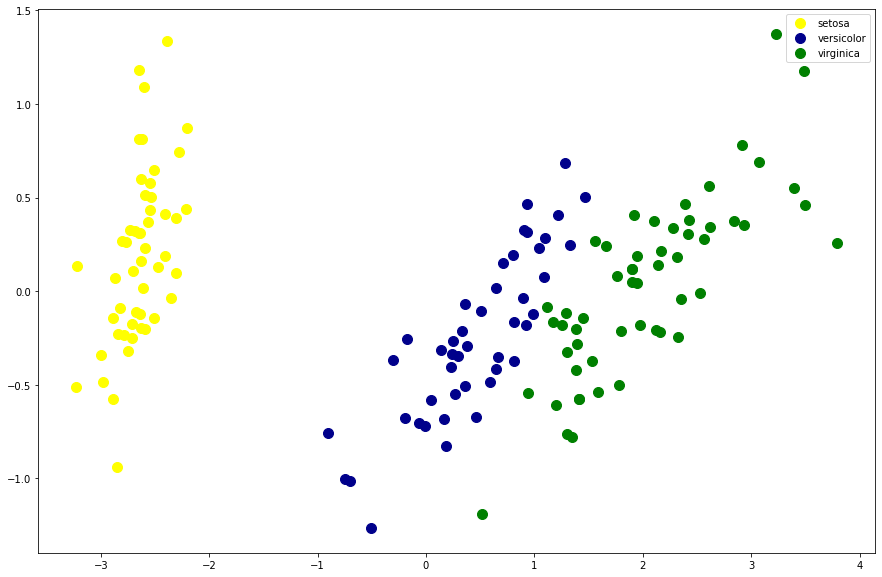

In [13]:
fig, ax =plt.subplots(1,1,figsize =(15,10))
for name, group in groups:
    ax.plot(group.PC1,group.PC2,color =col_code[name],label =label[name],marker='o',linestyle='',ms=10)
ax.legend()
plt.show()